In [3]:
pip install torch

   ---------------------------------------- 0.0/159.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/159.8 MB 640.0 kB/s eta 0:04:10
   ---------------------------------------- 0.1/159.8 MB 1.3 MB/s eta 0:02:02
   ---------------------------------------- 0.3/159.8 MB 2.2 MB/s eta 0:01:12
   ---------------------------------------- 0.6/159.8 MB 3.5 MB/s eta 0:00:46
   ---------------------------------------- 1.2/159.8 MB 5.3 MB/s eta 0:00:31
   ---------------------------------------- 1.8/159.8 MB 6.7 MB/s eta 0:00:24
    --------------------------------------- 2.4/159.8 MB 7.6 MB/s eta 0:00:21
    --------------------------------------- 3.0/159.8 MB 8.3 MB/s eta 0:00:19
    --------------------------------------- 3.4/159.8 MB 8.7 MB/s eta 0:00:18
    --------------------------------------- 3.9/159.8 MB 8.5 MB/s eta 0:00:19
   - -------------------------------------- 4.5/159.8 MB 8.9 MB/s eta 0:00:18
   - -------------------------------------- 4.6/159.8 MB 9.1 MB/s eta

In [58]:
import torch as torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
words = open("C:/Users/athul/Downloads/names.txt", 'r').read().splitlines()
print(words[:8])
print(len(words))

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']
32033


In [24]:
len(words)

32033

In [25]:
min(len(w) for w in words)

2

In [31]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram, 0) + 1
        print(ch1,ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>
<S> i
i s
s a
a b
b e
e l
l l
l a
a <E>
<S> s
s o
o p
p h
h i
i a
a <E>
<S> c
c h
h a
a r
r l
l o
o t
t t
t e
e <E>
<S> m
m i
i a
a <E>
<S> a
a m
m e
e l
l i
i a
a <E>
<S> h
h a
a r
r p
p e
e r
r <E>
<S> e
e v
v e
e l
l y
y n
n <E>
<S> a
a b
b i
i g
g a
a i
i l
l <E>
<S> e
e m
m i
i l
l y
y <E>
<S> e
e l
l i
i z
z a
a b
b e
e t
t h
h <E>
<S> m
m i
i l
l a
a <E>
<S> e
e l
l l
l a
a <E>
<S> a
a v
v e
e r
r y
y <E>
<S> s
s o
o f
f i
i a
a <E>
<S> c
c a
a m
m i
i l
l a
a <E>
<S> a
a r
r i
i a
a <E>
<S> s
s c
c a
a r
r l
l e
e t
t t
t <E>
<S> v
v i
i c
c t
t o
o r
r i
i a
a <E>
<S> m
m a
a d
d i
i s
s o
o n
n <E>
<S> l
l u
u n
n a
a <E>
<S> g
g r
r a
a c
c e
e <E>
<S> c
c h
h l
l o
o e
e <E>
<S> p
p e
e n
n e
e l
l o
o p
p e
e <E>
<S> l
l a
a y
y l
l a
a <E>
<S> r
r i
i l
l e
e y
y <E>
<S> z
z o
o e
e y
y <E>
<S> n
n o
o r
r a
a <E>
<S> l
l i
i l
l y
y <E>
<S> e
e l
l e
e a
a n
n o
o r
r <E>
<S> h
h a
a n
n n
n a
a 

In [35]:
sorted(b.items(), key = lambda kv: kv[1])

[(('q', 'r'), 1),
 (('d', 'z'), 1),
 (('p', 'j'), 1),
 (('q', 'l'), 1),
 (('p', 'f'), 1),
 (('q', 'e'), 1),
 (('b', 'c'), 1),
 (('c', 'd'), 1),
 (('m', 'f'), 1),
 (('p', 'n'), 1),
 (('w', 'b'), 1),
 (('p', 'c'), 1),
 (('h', 'p'), 1),
 (('f', 'h'), 1),
 (('b', 'j'), 1),
 (('f', 'g'), 1),
 (('z', 'g'), 1),
 (('c', 'p'), 1),
 (('p', 'k'), 1),
 (('p', 'm'), 1),
 (('x', 'n'), 1),
 (('s', 'q'), 1),
 (('k', 'f'), 1),
 (('m', 'k'), 1),
 (('x', 'h'), 1),
 (('g', 'f'), 1),
 (('v', 'b'), 1),
 (('j', 'p'), 1),
 (('g', 'z'), 1),
 (('v', 'd'), 1),
 (('d', 'b'), 1),
 (('v', 'h'), 1),
 (('h', 'h'), 1),
 (('g', 'v'), 1),
 (('d', 'q'), 1),
 (('x', 'b'), 1),
 (('w', 'z'), 1),
 (('h', 'q'), 1),
 (('j', 'b'), 1),
 (('x', 'm'), 1),
 (('w', 'g'), 1),
 (('t', 'b'), 1),
 (('z', 'x'), 1),
 (('p', 'b'), 2),
 (('t', 'g'), 2),
 (('q', 's'), 2),
 (('t', 'x'), 2),
 (('f', 'k'), 2),
 (('b', 't'), 2),
 (('j', 'n'), 2),
 (('k', 'c'), 2),
 (('z', 'k'), 2),
 (('s', 'j'), 2),
 (('s', 'f'), 2),
 (('z', 'j'), 2),
 (('n', 'q

In [36]:
import torch

In [48]:
N = torch.zeros((28,28), dtype=torch.int32)

In [55]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [61]:

for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

        
        # bigram = (ch1,ch2)
        # b[bigram] = b.get(bigram, 0) + 1
        # print(ch1,ch2)

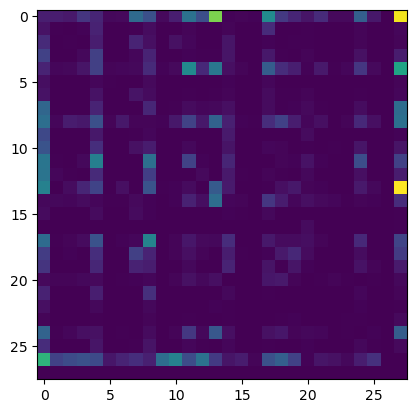

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)